# Simple neural network model

Neural networks is the next type of model we decided to explore. Generally these models are more complex with multiple layers but can also have high performance. In this instance we use a rather simplistic network with few layers. Importantly this method requires some scaling of the data so the approach is slightly different from the others.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import pandas as pd
from scipy import ndimage
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [3]:
def calculate_centroid_and_area(image):
    
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(img_hsv,(31, 69, 20), (82, 255, 255))
    
    area = np.sum(mask)/255
    centroid = ndimage.center_of_mass(mask)
    
    return [area,centroid]

In [4]:
# Assumes there are an equal number of top and front images
number_of_files = len([name for name in os.listdir('../Images') if name[0]!="."])
number_of_plants = int(number_of_files / 2)

results = pd.DataFrame(columns=['Plant_number', 'Area_front', 'Centroid_front', 'Area_top', 'Centroid_top'])

for x in range(number_of_plants):
    row = []
    
    row.append("Plant" + str(x+1))
    
    image_front = cv2.imread(f'../Images/Plant{x+1}_front_Color.png')
    image_top = cv2.imread(f'../Images/Plant{x+1}_top_Color.png')
    
    front_result = calculate_centroid_and_area(image_front)
    top_result = calculate_centroid_and_area(image_top)
    
    row = row + front_result + top_result
    
    results.loc[len(results)] = row
    
print(results)
    

   Plant_number  Area_front                           Centroid_front  \
0        Plant1     72055.0   (321.6569009784193, 667.9332315592256)   
1        Plant2     68354.0   (335.5661702314422, 706.0572607309009)   
2        Plant3     40422.0  (401.83724209588837, 649.1364850823809)   
3        Plant4     62747.0  (331.01727572632956, 692.3932937032846)   
4        Plant5     56655.0   (351.8390433324508, 751.1261671520607)   
5        Plant6     36733.0   (376.9781667710233, 719.6792802112542)   
6        Plant7     58318.0  (398.34088960526765, 653.4697691964745)   
7        Plant8     69904.0  (419.84069581139846, 630.2788395513847)   
8        Plant9     62220.0  (437.33539054966246, 648.5444069431051)   
9       Plant10     41865.0    (406.4778693419324, 614.602651379434)   
10      Plant11     58057.0    (392.908744854195, 675.5261208812029)   
11      Plant12     96526.0    (350.6438472535897, 666.881534508837)   
12      Plant13     90898.0    (352.8019208343418, 696.223525270

In [5]:
PlantData = pd.read_csv("../PlantData.csv")

In [6]:
Data = results.join(PlantData.set_index('Plant_number'), on='Plant_number')

This neural network requires scaling of the x and y values. To this end we emploid the standardscaler function from sklearn

In [7]:
# Separate Target Variable and Predictor Variables
TargetVariable=['LAI']
Predictors=['Area_top','Area_front']
 
X=Data[Predictors].values
y=Data[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 2)
(40, 1)
(10, 2)
(10, 1)


Here we construct the neural network structure. In this case the network has an input layer, one hidden layer and an output node. The activation functions are tuned for the highest performance.

In [8]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=2, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

#extra layer



# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 1.0269
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 1.0258
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 1.0250
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 1.0244
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 1.0237
Epoch 6/500
2/2 [==============================] - 0s 0s/step - loss: 1.0228
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 1.0219
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 1.0209
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 1.0200
Epoch 10/500
2/2 [==============================] - 0s 0s/step - loss: 1.0185
Epoch 11/500
2/2 [==============================] - 0s 0s/step - loss: 1.0178
Epoch 12/500
2/2 [==============================] - 0s 4ms/step - loss: 1.0165
Epoch 13/500
2/2 [==============================] - 0s 0s/step - loss

2/2 [==============================] - 0s 0s/step - loss: 0.3014
Epoch 106/500
2/2 [==============================] - 0s 4ms/step - loss: 0.2972
Epoch 107/500
2/2 [==============================] - 0s 0s/step - loss: 0.2942
Epoch 108/500
2/2 [==============================] - 0s 4ms/step - loss: 0.2915
Epoch 109/500
2/2 [==============================] - 0s 826us/step - loss: 0.2883
Epoch 110/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2854
Epoch 111/500
2/2 [==============================] - 0s 0s/step - loss: 0.2825
Epoch 112/500
2/2 [==============================] - 0s 0s/step - loss: 0.2807
Epoch 113/500
2/2 [==============================] - 0s 0s/step - loss: 0.2775
Epoch 114/500
2/2 [==============================] - 0s 3ms/step - loss: 0.2753
Epoch 115/500
2/2 [==============================] - 0s 0s/step - loss: 0.2733
Epoch 116/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2706
Epoch 117/500
2/2 [==============================] - 0s 0s

2/2 [==============================] - 0s 1ms/step - loss: 0.1997
Epoch 209/500
2/2 [==============================] - 0s 0s/step - loss: 0.1997
Epoch 210/500
2/2 [==============================] - 0s 0s/step - loss: 0.1995
Epoch 211/500
2/2 [==============================] - 0s 250us/step - loss: 0.1994
Epoch 212/500
2/2 [==============================] - 0s 0s/step - loss: 0.1992
Epoch 213/500
2/2 [==============================] - 0s 0s/step - loss: 0.1990
Epoch 214/500
2/2 [==============================] - 0s 5ms/step - loss: 0.1990
Epoch 215/500
2/2 [==============================] - 0s 0s/step - loss: 0.1988
Epoch 216/500
2/2 [==============================] - 0s 4ms/step - loss: 0.1987
Epoch 217/500
2/2 [==============================] - 0s 0s/step - loss: 0.1985
Epoch 218/500
2/2 [==============================] - 0s 0s/step - loss: 0.1985
Epoch 219/500
2/2 [==============================] - 0s 247us/step - loss: 0.1986
Epoch 220/500
2/2 [==============================] - 0s 0

2/2 [==============================] - 0s 5ms/step - loss: 0.1948
Epoch 312/500
2/2 [==============================] - 0s 0s/step - loss: 0.1948
Epoch 313/500
2/2 [==============================] - 0s 0s/step - loss: 0.1948
Epoch 314/500
2/2 [==============================] - 0s 5ms/step - loss: 0.1948
Epoch 315/500
2/2 [==============================] - 0s 0s/step - loss: 0.1948
Epoch 316/500
2/2 [==============================] - 0s 5ms/step - loss: 0.1947
Epoch 317/500
2/2 [==============================] - 0s 0s/step - loss: 0.1947
Epoch 318/500
2/2 [==============================] - 0s 0s/step - loss: 0.1947
Epoch 319/500
2/2 [==============================] - 0s 0s/step - loss: 0.1949
Epoch 320/500
2/2 [==============================] - 0s 2ms/step - loss: 0.1947
Epoch 321/500
2/2 [==============================] - 0s 0s/step - loss: 0.1947
Epoch 322/500
2/2 [==============================] - 0s 5ms/step - loss: 0.1947
Epoch 323/500
2/2 [==============================] - 0s 0s/st

2/2 [==============================] - 0s 0s/step - loss: 0.1943
Epoch 415/500
2/2 [==============================] - 0s 0s/step - loss: 0.1945
Epoch 416/500
2/2 [==============================] - 0s 0s/step - loss: 0.1943
Epoch 417/500
2/2 [==============================] - 0s 0s/step - loss: 0.1943
Epoch 418/500
2/2 [==============================] - 0s 0s/step - loss: 0.1943
Epoch 419/500
2/2 [==============================] - 0s 0s/step - loss: 0.1945
Epoch 420/500
2/2 [==============================] - 0s 0s/step - loss: 0.1943
Epoch 421/500
2/2 [==============================] - 0s 769us/step - loss: 0.1944
Epoch 422/500
2/2 [==============================] - 0s 0s/step - loss: 0.1943
Epoch 423/500
2/2 [==============================] - 0s 0s/step - loss: 0.1943
Epoch 424/500
2/2 [==============================] - 0s 0s/step - loss: 0.1943
Epoch 425/500
2/2 [==============================] - 0s 0s/step - loss: 0.1944
Epoch 426/500
2/2 [==============================] - 0s 5ms/ste

The neural network shows high performance with a MAE of 4,9%

63.14520312499998
   Actuals  Predictions  Plant Numbers
2   964.64   913.266602              1
0  1199.86  1126.661865              2
3  1216.18  1251.886108              3
9  1220.36  1203.495972              4
8  1321.61  1288.799927              5
7  1335.69  1231.751099              6
5  1343.02  1361.869751              7
6  1358.58  1263.956787              8
4  1363.92  1350.598022              9
1  1606.91  1416.143555             10


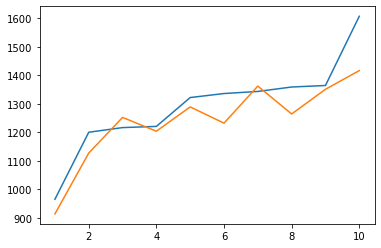

In [10]:
close_predictions = model.predict(X_test)   
close_predictions = TargetVarScalerFit.inverse_transform(close_predictions)
close_predictions = close_predictions.flatten()
y_test = TargetVarScalerFit.inverse_transform(y_test)
y_test = y_test.flatten()
mae = sum(abs(close_predictions - y_test)) / y_test.shape[0]

print(mae)
NN_results = pd.DataFrame(columns = ['Actuals'])
NN_results['Predictions'] = close_predictions
NN_results['Actuals'] = y_test


NN_results.sort_values(by=['Actuals'],inplace = True)
NN_results['Plant Numbers'] = np.arange(1,11).tolist()
print(NN_results)

plt.plot(NN_results['Plant Numbers'],NN_results['Actuals'],NN_results['Plant Numbers'],NN_results['Predictions'])

In [11]:
mae/np.average(NN_results['Actuals'])

0.048833289220208846